# Dataset ThoraxCBCT Info



With the release of the ThoraxCBCT dataset the registration problem of image guided radiation therapy (IGRT) between pre-therapeutic fan beam CT (FBCT) and interventional low dose cone beam CT (CBCT) is addressed.
The released image data is part of the 4D-Lung dataset from The Cancer Imaging Archive which contains four-dimensional lung images acquired during radiochemotherapy of locally-advanced, non-small cell lung cancer (NSCLC) patients https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=21267414.

For each patient one FBCT prior to therapy in maximum inspiration is provided which is denoted by the filename ending _0000.nii.gz. Further, there are two CBCTs for each patient, one at the beginning of therapy (_0001.nii.gz) and one at the end of therapy (_0002.nii.gz). Both are acquired in maximum expiration.
The task is to find one solution for the registration of two pairs of images per patient:
1. The planning FBCT (inspiration) prior to therapy and the low dose CBCT at the beginning of therapy (expiration), which are acquired at similar timepoints, and
2. The planning FBCT (inspiration) prior to therapy and the low dose CBCT at the end of therapy (expiration), where longer periods of time (usually several months) lay in between the scans.

The challenge in both pairs of images is the registration of images from the two different modalities FBCT and CBCT and also the shift in breathing phases between maximum inspiration and expiration. In the second subtask there is an additional challenge with the time shift between the planning CT at the beginning of therapy and the follow up CBCT at the end of therapy.

The released dataset includes training images of 11 patients resulting in 11 FBCT and 22 CBCT images, and validation images of 3 patients with 3 FBCT and 6 CBCT images. The images are paired as described above with two image pairs per patient, resulting in 22 image pairs for training and 6 image pairs for validation. Additionally, Foerstner keypoints are provided in two folders:  keypoints01Tr  and  keypoints02Tr . This has changed with regard to previous L2R releases, due to the FBCT images being used in two image pairings. The keypoints were created based on displacements resulting from deedsBCV registration for every image pair (https://github.com/mattiaspaul/deedsBCV), which leads to two different keypoint files for every FBCT image. The keypoints for the first subtask (FBCT, CBCT beginning of therapy) are stored in  keypoints01Tr  with the filename ending _0000.csv denoting the keypoints for the FBCT (_0000.nii.gz) and _0001.csv for the CBCT (_0001.nii.gz).
Along this denotation the keypoints for the second subtask are stored in  keypoints02Tr  with again the FBCT keypoint filename ending being _0000.csv and _0002.csv for the CBCT at the end of therapy (_0002.nii.gz). The correspondences for the validation cases will not be published yet.

In contrast to previous tasks, the focus of this task is not mainly on the lung, but also on other thoracic organs, especially organs at risk with regard to radiotherapy, which is why the keypoints were determined not only in the lung, but in the entire trunk region.

The test data will be manually annotated with multiple masks (lung(lobes), tumor, organs at risk (heart, spinal cord, esophagus, etc.)) as well as anatomical landmarks such as airway bifurcations, top of aortic arch, apex cordis and bone structures such as the sternum, ribs, clavicles and vertebrae. Both TRE and Dice coefficients will be used in the evaluation.

For details on the image acquisition (scanner details etc.) please see https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=21267414. All images are converted to nifti, resampled and cropped to the region of interest (thorax) resulting in an image size of 390x280x300 with a spacing of 1x1x1mm.


# Background info FBCT/CBCT

<table><tr>
  <td> <img src="https://media.aofoundation.org/-/jssmedia/surgery/9x/9x_x001_i120.png?w=620" alt="CBCT" style="width:100%"> </td>
  <td> <img src="https://media.aofoundation.org/-/jssmedia/surgery/9x/9x_x001_i100.png?w=620" alt="CBCT" style="width:100%"> </td>
</tr></table>

[Source](https://surgeryreference.aofoundation.org/cmf/further-reading/cas-cone-beam-vs-fan-beam-ct?searchurl=%2fsearchresults#cone-beam-ct)

# Setup

In [1]:
!pip install itk-elastix
#!git clone https://github.com/MirkoMartens/voxelmorph_dlmb.git
!pip install neurite
!pip install lpips

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.8 MB 6.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.8 MB 7.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.8 MB 8.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.8 MB 8.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.8 MB 8.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.8 MB 8.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.8 MB 3.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 5.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.9 MB/s eta 0:00:02
   ---------- -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.9.0 which is incompatible.



     ---------------------------------------- 0.0/53.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/53.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/53.8 kB 165.2 kB/s eta 0:00:01
     --------------------- ---------------- 30.7/53.8 kB 187.9 kB/s eta 0:00:01
     ------------------------------------ - 51.2/53.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 53.8/53.8 kB 232.7 kB/s eta 0:00:00
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     --- ------------------------------------ 0.5/5.7 MB 9.8 MB/s eta 0:00:01
     ---------- ----------------------------- 1.6/5.7 MB 16.6 MB/s eta 0:00:01
     ------------------ --------------------- 2.7/5.7 MB 21.1 MB/s eta 0:00:01
     --------------------------- ------------ 3.9/5.7 MB 23.0 MB/s eta 0:00:01
     ----------------------------------- ---- 5.1/5.7 MB 21.6 MB/s eta 0:0

In [3]:
!pip install ipywidgets

  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.9-py3-none-any.whl (2.3 MB)


In [7]:
# General imports
import os, sys
import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import tensorflow as tf
import torch
from enum import Enum

# Voxelmorph/Hypermorph
#sys.path.append('voxelmorph_dlmb')
import voxelmorph as vxm
import neurite as ne

# Rigid/Affine alignment
import itk

# Metrics
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
import lpips

#GUI
from ipywidgets import interact, interactive, widgets, Layout
from IPython.display import display, clear_output

# Load data

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Copy dataset from drive and extract
!unzip "/content/gdrive/MyDrive/DLMB_Project/ThoraxCBCT.zip" -d '/content/'
%rm -r /content/__MACOSX

In [ ]:
# Copy already preprcessed data from drive
%cp -r /content/gdrive/MyDrive/DLMB_Project/data_preprocessed_scaled /content/data_preprocessed_scaled

# Preprocessing

### Extract training data

In [ ]:
data = [
    (40, 160),
    (60, 170),
    (70, 210),
    (70, 210),
    (100, 240),
    (60, 200),
    (120, 250),
    (140, 270),
    (90, 130),
    (90, 230),
    (120, 240),
    (130, 210),
    (150, 280),
    (60, 200)
]

slice_depths_dict = {index: (min_value, max_value) for index, (min_value, max_value) in enumerate(data)}

def preprocess_data_3D(input_dir, output_dir):
    # Check if the provided path is a directory
    if not os.path.isdir(input_dir):
        print(f"Error: {input_dir} is not a valid directory.")
        return

    # Iterate over each file in the directory
    for i in range(14):
      slice_num = "000"+str(i) if i < 10 else "00"+str(i)
      min_bound = slice_depths_dict[i][0]
      max_bound = slice_depths_dict[i][1]

      num_stacks = (max_bound-min_bound)//32

      for j in range(3):

        filename = input_dir+'ThoraxCBCT_'+slice_num+'_000'+str(j)+'.nii.gz'
        print(filename)

        nifti_img = nib.load(filename)
        img_data = nifti_img.get_fdata()

        for k in range(num_stacks):

          output_filename = 'ThoraxCBCT_'+slice_num+'_'+str(k)+'_000'+str(j)+'.nii.gz'
          min_z = min_bound + k * 32
          max_z = min_z + 32
          # slice to get 2D image and crop from (390, 280, 300) to dim (256, 256, 32)
          img_cropped = img_data[67:-67,12:-12,min_z:max_z]
          print(img_cropped.shape)

          lb = np.percentile(img_cropped, 0.5)
          ub = np.percentile(img_cropped, 99.5)
          img_clip = np.clip(img_cropped, lb, ub)

          # scale values between 0 and 1
          img_scaled = (img_clip - np.min(img_clip))/np.ptp(img_clip)

          # save as nifti
          empty_header = nib.Nifti1Header()
          new_nifti_img = nib.Nifti1Image(img_scaled, nifti_img.affine, empty_header)

          nib.save(new_nifti_img, filename=os.path.join(output_dir, output_filename))

In [ ]:
%mkdir data_preprocessed_scaled

In [ ]:
# preprocess data
preprocess_data_3D(input_dir='/content/ThoraxCBCT/imagesTr/', output_dir='/content/data_preprocessed_scaled')

### Create train list

In [ ]:
# Function to create train list from data folder (patient which are used as test set (11, 12, 13) are excluded)
def create_train_list(path):
  with open('train_list.txt','w') as file:
    for root, dirs, files in os.walk(path):
      for file_name in files:
        print(file_name)
        # Check if the file is a FBCT image
        if "0011" in file_name or "0012" in file_name or "0013" in file_name:
          continue
        if "_0000.nii.gz" in file_name:
          fbct_path = os.path.join(root, file_name)

          underscore_split = file_name.split('_')

          thorax_prefix = underscore_split[0]
          prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
          #print("Prefix: "+prefix)

          # Check if corresponding CBCT images exist
          cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
          cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

          if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):
            # Write the pair to the train_list file
            file.write(f"{fbct_path} {cbct_start_path}\n")
            file.write(f"{fbct_path} {cbct_end_path}\n")

In [ ]:
data_path = pathlib.Path('/content/data_preprocessed_scaled')
create_train_list(path=data_path)

# Rigid & Affine Alignment

### Rigid Alignment Example

In [ ]:
fixed_img_path = '/content/data_preprocessed_scaled/ThoraxCBCT_0000_0_0002.nii.gz' # CBCT start/end
moving_img_path = '/content/data_preprocessed_scaled/ThoraxCBCT_0000_0_0000.nii.gz' # FBCT
fixed_img = itk.imread(fixed_img_path, itk.F)
moving_img = itk.imread(moving_img_path, itk.F)

parameter_object_rigid = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object_rigid.GetDefaultParameterMap('rigid')
parameter_object_rigid.AddParameterMap(default_rigid_parameter_map)

moved_img, _ = itk.elastix_registration_method(fixed_img, moving_img, parameter_object=parameter_object_rigid, log_to_console=True)

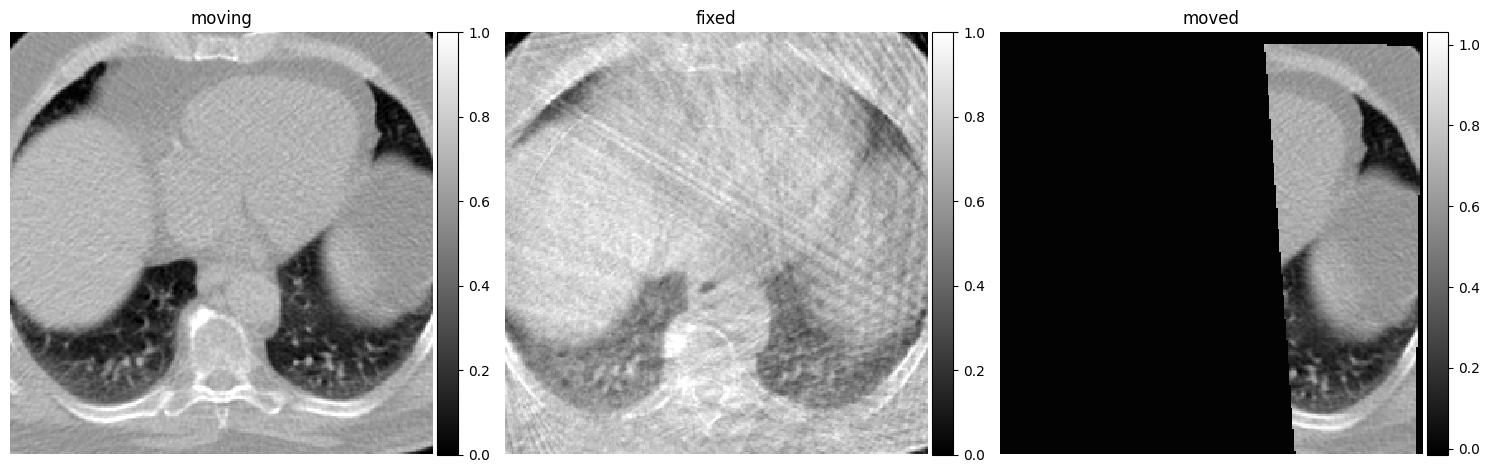

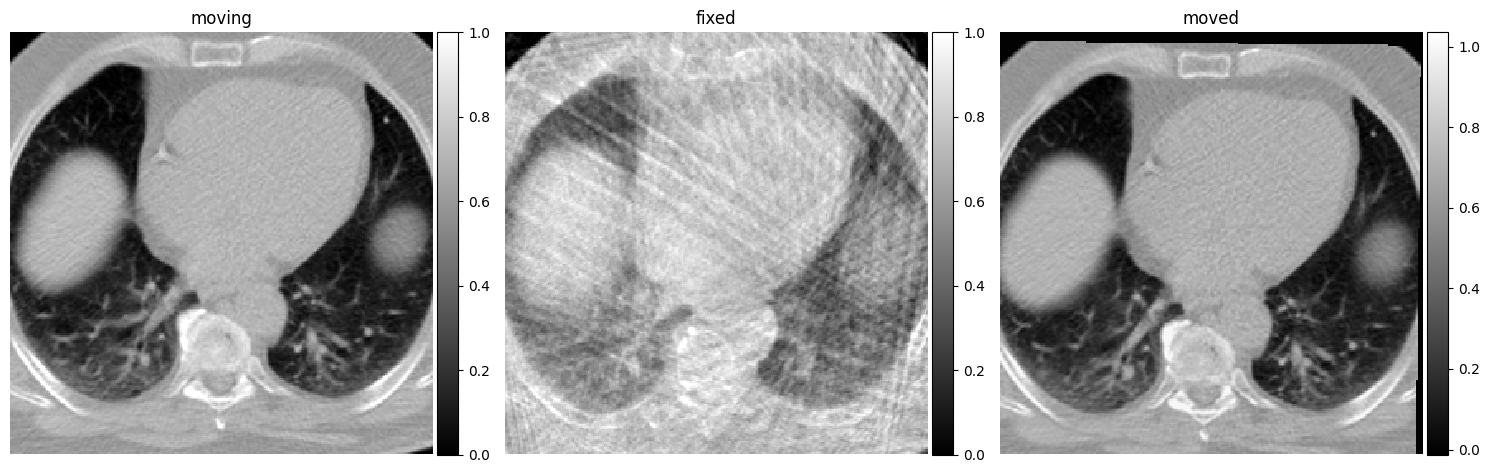

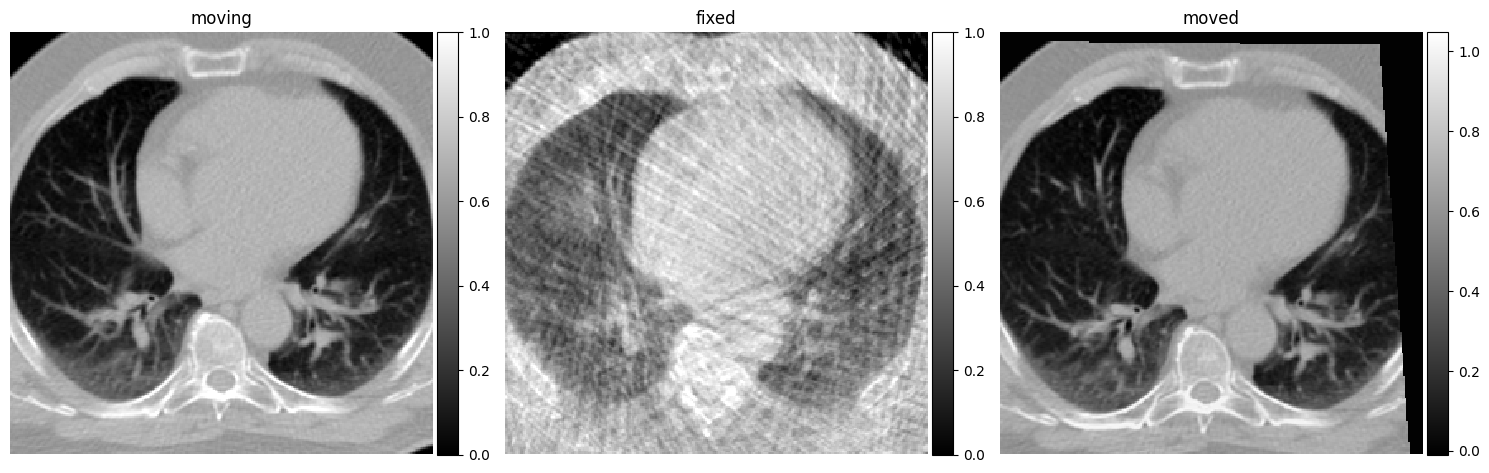

In [ ]:
fixed_img_data = itk.GetArrayFromImage(fixed_img)
moving_img_data = itk.GetArrayFromImage(moving_img)
moved_img_data = itk.GetArrayFromImage(moved_img)
slices_fixed = [fixed_img_data[0,:,:], fixed_img_data[15,:,:], fixed_img_data[31,:,:]]
slices_moving = [moving_img_data[0,:,:], moving_img_data[15,:,:], moving_img_data[31,:,:]]
slices_moved = [moved_img_data[0,:,:],moved_img_data[15,:,:],moved_img_data[31,:,:]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

### Affine Alignment Example


In [ ]:
fixed_img_path = '/content/data_preprocessed_scaled/ThoraxCBCT_0000_0_0002.nii.gz' # CBCT start/end
moving_img_path = '/content/data_preprocessed_scaled/ThoraxCBCT_0000_0_0000.nii.gz' # FBCT
fixed_img = itk.imread(fixed_img_path, itk.F)
moving_img = itk.imread(moving_img_path, itk.F)

parameter_object_affine = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object_affine.GetDefaultParameterMap('affine')
parameter_object_affine.AddParameterMap(default_affine_parameter_map)

moved_img, _ = itk.elastix_registration_method(fixed_img, moving_img, parameter_object=parameter_object_affine, log_to_console=False)

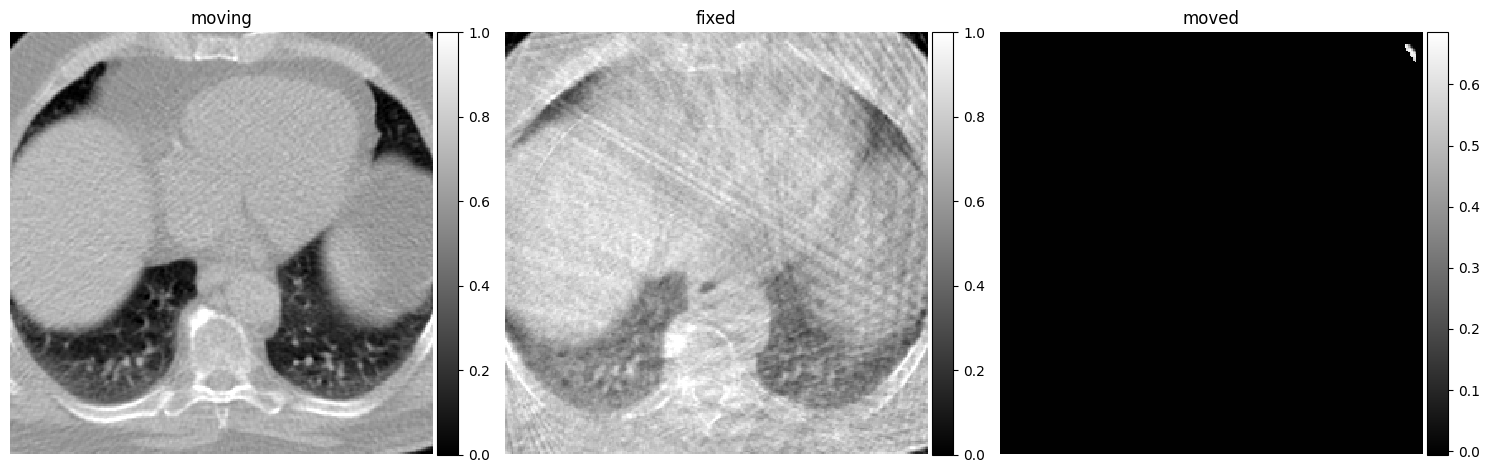

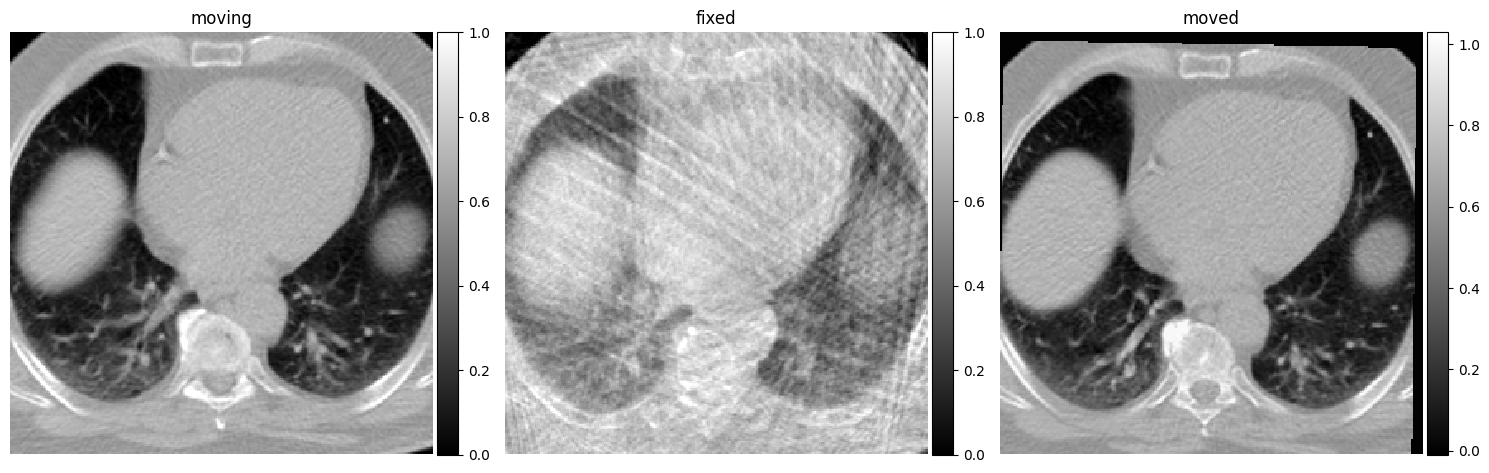

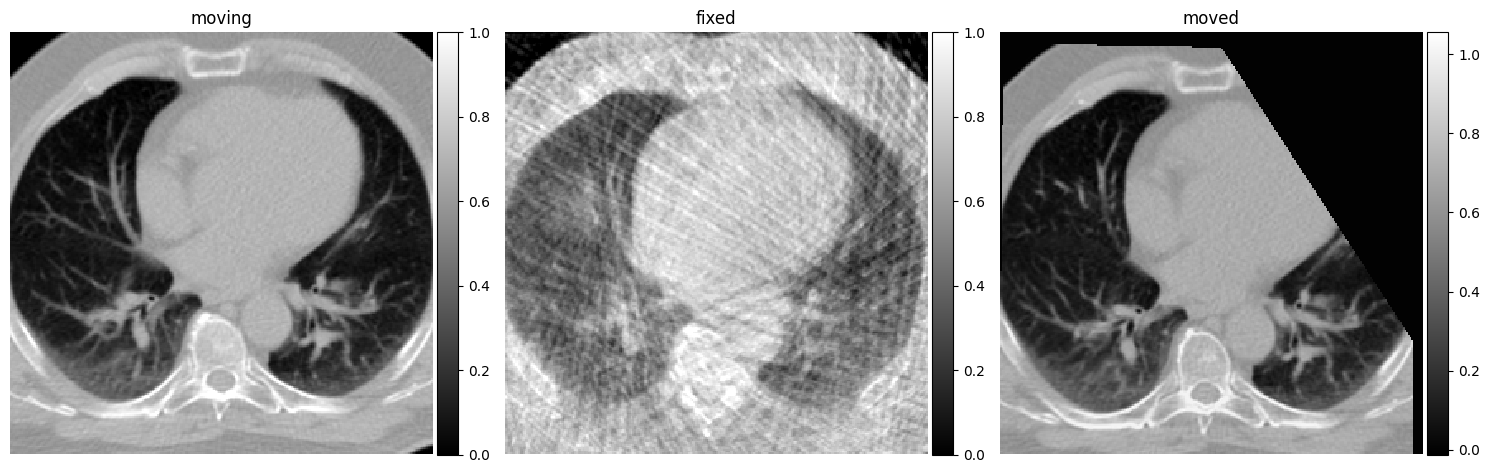

In [ ]:
fixed_img_data = itk.GetArrayFromImage(fixed_img)
moving_img_data = itk.GetArrayFromImage(moving_img)
moved_img_data = itk.GetArrayFromImage(moved_img)
slices_fixed = [fixed_img_data[0,:,:], fixed_img_data[15,:,:], fixed_img_data[31,:,:]]
slices_moving = [moving_img_data[0,:,:], moving_img_data[15,:,:], moving_img_data[31,:,:]]
slices_moved = [moved_img_data[0,:,:],moved_img_data[15,:,:],moved_img_data[31,:,:]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

# Voxelmorph

In [ ]:
# run training via train.py (here just 10 epochs for demonstration)
%run -i /content/voxelmorph_dlmb/scripts/tf/train.py --img-list 'train_list.txt' --model-dir '/content/models' --epochs 10

The basic version of Colab is not designed to train models due to runtime terminations during inactivity. Therefore we trained a Voxelmorph model on our own computer.

In [ ]:
# Load saved training history
with open('/content/gdrive/MyDrive/DLMB_Project/trainHistoryDictVoxelmorph.pickle', 'rb') as f:
    train_history_voxelmorph = pickle.load(f)

loss = train_history_voxelmorph['loss']
vxm_dense_transformer_loss = train_history_voxelmorph['vxm_dense_transformer_loss']
vxm_dense_flow_resize_loss = train_history_voxelmorph['vxm_dense_flow_resize_loss']

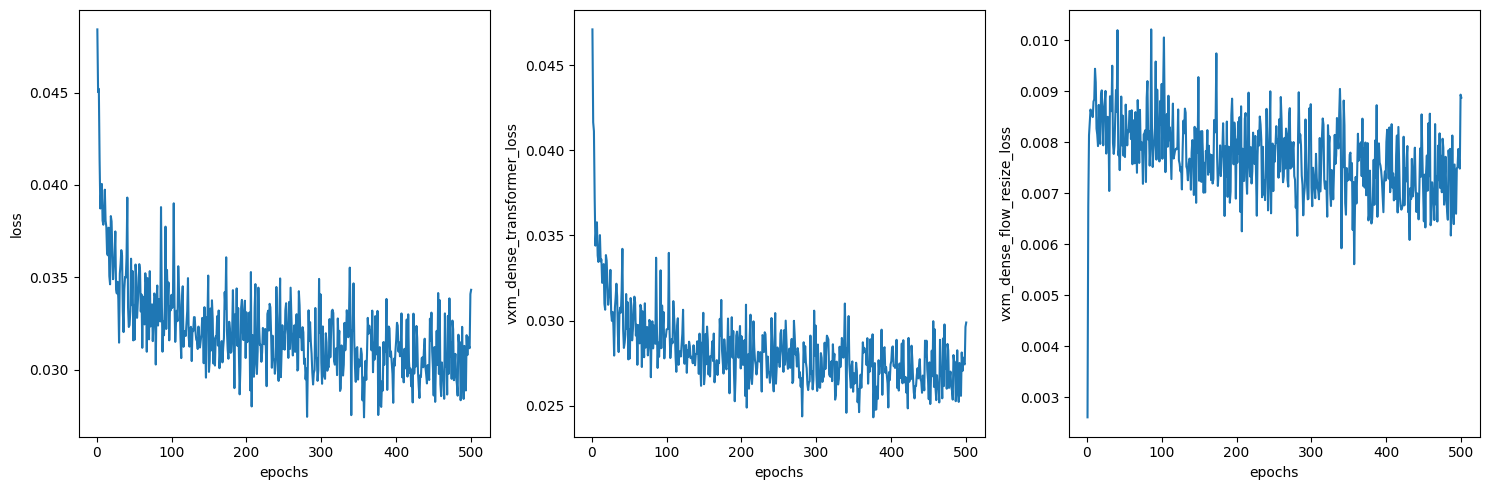

In [ ]:
epochs = np.linspace(1, 500, 500)

# plot losses
fig, axs = plt.subplots(1, 3)

axs[0].plot(epochs, loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].plot(epochs, vxm_dense_transformer_loss)
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('vxm_dense_transformer_loss')

axs[2].plot(epochs, vxm_dense_flow_resize_loss)
axs[2].set_xlabel('epochs')
axs[2].set_ylabel('vxm_dense_flow_resize_loss')

fig.set_size_inches(15, 5)
plt.tight_layout()
plt.show(block=True)

First look at the results:

In [ ]:
# Register image segment from training set
%run -i /content/voxelmorph_dlmb/scripts/tf/register.py --moving /content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0000.nii.gz --fixed /content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0001.nii.gz --model /content/gdrive/MyDrive/DLMB_Project/voxelmorph_models/0500.h5 --moved moved_eval_voxelmorph.nii.gz --warp warp_eval_voxelmorph.nii.gz --gpu 0
# Register  image segment from test set
%run -i /content/voxelmorph_dlmb/scripts/tf/register.py --moving /content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0000.nii.gz --fixed /content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0001.nii.gz --model /content/gdrive/MyDrive/DLMB_Project/voxelmorph_models/0500.h5 --moved moved_test_voxelmorph.nii.gz --warp warp_test_voxelmorph.nii.gz --gpu 0

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 374ms/step


<Figure size 640x480 with 0 Axes>

In [ ]:
fixed_eval = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0001.nii.gz')
moving_eval = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0000.nii.gz')
fixed_test = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0001.nii.gz')
moving_test = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0000.nii.gz')

moved_eval_voxelmorph = nib.load('/content/moved_eval_voxelmorph.nii.gz')
moved_test_voxelmorph = nib.load('/content/moved_test_voxelmorph.nii.gz')

fixed_eval_data = fixed_eval.get_fdata()
moving_eval_data = moving_eval.get_fdata()
fixed_test_data = fixed_test.get_fdata()
moving_test_data = moving_test.get_fdata()
moved_eval_voxelmorph_data = moved_eval_voxelmorph.get_fdata()
moved_test_voxelmorph_data = moved_test_voxelmorph.get_fdata()

In [ ]:
# plot results from model trained after 500 epochs (training data)
slices_fixed = [fixed_eval_data[:,:,0], fixed_eval_data[:,:,15], fixed_eval_data[:,:,31]]
slices_moving = [moving_eval[:,:,0], moving_eval[:,:,15], moving_eval[:,:,31]]
slices_moved = [moved_eval_voxelmorph_data[:,:,0],moved_eval_voxelmorph_data[:,:,15],moved_eval_voxelmorph_data[:,:,31]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

In [ ]:
# plot results from model trained after 500 epochs (test data)
slices_fixed = [fixed_test_data[:,:,0], fixed_test_data[:,:,15], fixed_test_data[:,:,31]]
slices_moving = [moving_test_data[:,:,0], moving_test_data[:,:,15], moving_test_data[:,:,31]]
slices_moved = [moved_test_voxelmorph_data[:,:,0],moved_test_voxelmorph_data[:,:,15],moved_test_voxelmorph_data[:,:,31]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

# Hypermorph

In [ ]:
# run training via train.py (here just 10 epochs for demonstration)
%run -i /content/voxelmorph_dlmb/scripts/tf/train_hypermorph.py --img-list 'train_list.txt' --model-dir '/content/models' --epochs 10

In [ ]:
# Load saved training history
with open('/content/gdrive/MyDrive/DLMB_Project/trainHistoryDictHypermorph.pickle', 'rb') as f:
    train_history_hypermorph = pickle.load(f)

loss = train_history_hypermorph['loss']
hyper_vxm_dense_transformer_loss = train_history_hypermorph['hyper_vxm_dense_transformer_loss']
hyper_vxm_dense_flow_loss = train_history_hypermorph['hyper_vxm_dense_flow_loss']

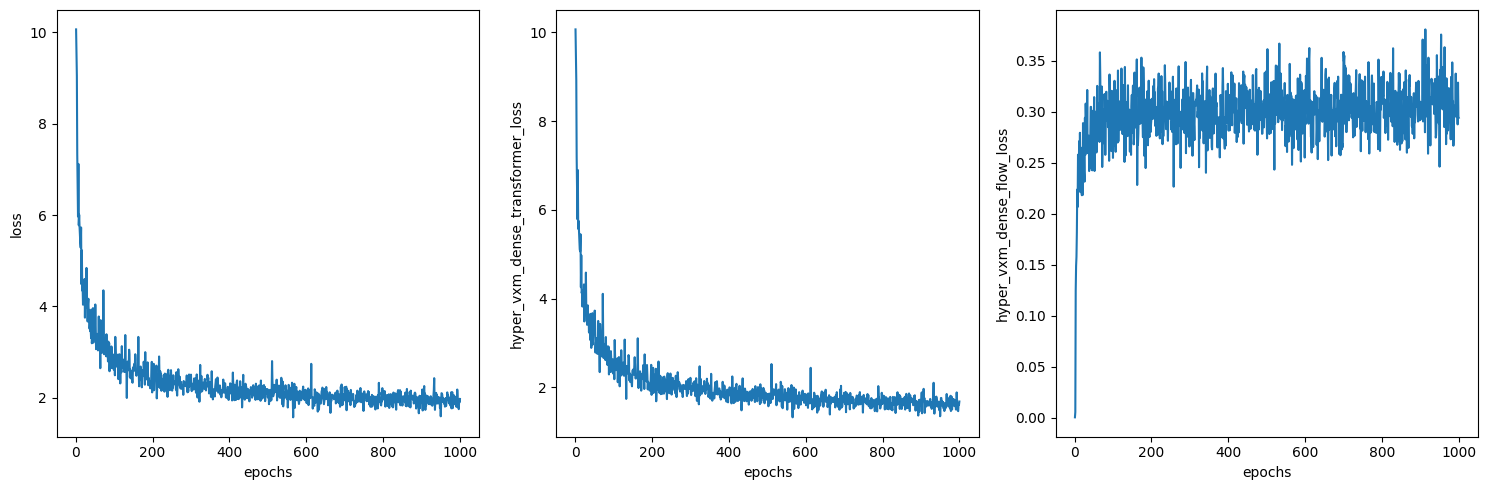

In [ ]:
epochs = np.linspace(1, 1000, 1000)

# plot losses
fig, axs = plt.subplots(1, 3)

axs[0].plot(epochs, loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].plot(epochs, hyper_vxm_dense_transformer_loss)
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('hyper_vxm_dense_transformer_loss')

axs[2].plot(epochs, hyper_vxm_dense_flow_loss)
axs[2].set_xlabel('epochs')
axs[2].set_ylabel('hyper_vxm_dense_flow_loss')

fig.set_size_inches(15, 5)
plt.tight_layout()
plt.show(block=True)

First look at the results:

In [ ]:
# Register image segment from training set
%run -i /content/voxelmorph_dlmb/scripts/tf/register_hypermorph.py --moving /content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0000.nii.gz --fixed /content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0001.nii.gzz --model /content/gdrive/MyDrive/DLMB_Project/hypermorph_models/1000.h5 --moved moved_eval_hypermorph.nii.gz --warp warp_eval_hypermorph.nii.gz --gpu 0 --lambda_val 0.7
# Register  image segment from test set
%run -i /content/voxelmorph_dlmb/scripts/tf/register_hypermorph.py --moving /content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0000.nii.gz --fixed /content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0001.nii.gz --model /content/gdrive/MyDrive/DLMB_Project/hypermorph_models/1000.h5 --moved moved_test_hypermorph.nii.gz --warp warp_test_hypermorph.nii.gz --gpu 0 --lambda_val 0.7

1/1 [==============================] - 5s 5s/step


<Figure size 640x480 with 0 Axes>

In [ ]:
fixed_eval = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0001.nii.gz')
moving_eval = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_0007_1_0000.nii.gz')
fixed_test = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0001.nii.gz')
moving_test = nib.load('/content/data_preprocessed_scaled/ThoraxCBCT_00012_1_0000.nii.gz')

moved_eval_hypermorph = nib.load('/content/moved_eval_hypermorph.nii.gz')
moved_test_hypermorph = nib.load('/content/moved_test_hypermorph.nii.gz')

fixed_eval_data = fixed_eval.get_fdata()
moving_eval_data = moving_eval.get_fdata()
fixed_test_data = fixed_test.get_fdata()
moving_test_data = moving_test.get_fdata()
moved_eval_hypermorph_data = moved_eval_hypermorph.get_fdata()
moved_test_hypermorph_data = moved_test_hypermorph.get_fdata()

In [ ]:
# plot results from model trained after 500 epochs (training data)
slices_fixed = [fixed_eval_data[:,:,0], fixed_eval_data[:,:,15], fixed_eval_data[:,:,31]]
slices_moving = [moving_eval[:,:,0], moving_eval[:,:,15], moving_eval[:,:,31]]
slices_moved = [moved_eval_hypermorph_data[:,:,0],moved_eval_hypermorph_data[:,:,15],moved_eval_hypermorph_data[:,:,31]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

In [ ]:
# plot results from model trained after 500 epochs (training data)
slices_fixed = [fixed_eval_data[:,:,0], fixed_eval_data[:,:,15], fixed_eval_data[:,:,31]]
slices_moving = [moving_eval[:,:,0], moving_eval[:,:,15], moving_eval[:,:,31]]
slices_moved = [moved_eval_hypermorph_data[:,:,0],moved_eval_hypermorph_data[:,:,15],moved_eval_hypermorph_data[:,:,31]]
titles = ['moving', 'fixed', 'moved']
for i in range(len(slices_fixed)):
  ne.plot.slices([slices_moving[i] , slices_fixed[i] , slices_moved[i]], cmaps=['gray'], do_colorbars=True, titles=titles);

Evaluate trained model for various lambda


In [ ]:
mse_scores = []
ssim_scores = []

path = '/content/data_preprocessed_scaled'
hypermorph_model = vxm.networks.HyperVxmDense.load('/content/gdrive/MyDrive/DLMB_Project/hypermorph_models/1000.h5')
# sweep across 20 values of lambda
for i, hyp in enumerate(np.linspace(0, 1, 21)):
    print("i: ", i)
    temp_mse_scores = []
    temp_ssim_scores = []
    hyp = np.array([[hyp]], dtype='float32')  # reformat hyperparam

    for root, dirs, files in os.walk(path):
          for file_name in files:
            # Check if the file is a FBCT image
            if "0011" in file_name or "0012" in file_name or "0013" in file_name:
              continue
            if "_0000.nii.gz" in file_name:
              print(file_name)
              fbct_path = os.path.join(root, file_name)

              underscore_split = file_name.split('_')

              thorax_prefix = underscore_split[0]
              prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
              #print("Prefix: "+prefix)

              # Check if corresponding CBCT images exist
              cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
              cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

              ##################################################################
              moving = vxm.py.utils.load_volfile(fbct_path, add_batch_axis=True,
                                    add_feat_axis=True)
              fixed = vxm.py.utils.load_volfile(cbct_start_path, add_batch_axis=True,
                                  add_feat_axis=True)
              img = hypermorph_model.predict([moving, fixed, hyp])[0].squeeze()

              temp_mse_scores.append(mean_squared_error(img.flatten(), fixed.flatten()))
              temp_ssim_scores.append(structural_similarity(img, fixed.squeeze(), data_range=1))

              ##################################################################
              fixed = vxm.py.utils.load_volfile(cbct_end_path, add_batch_axis=True,
                                  add_feat_axis=True)
              img = hypermorph_model.predict([moving, fixed, hyp])[0].squeeze()

              temp_mse_scores.append(mean_squared_error(img.flatten(), fixed.flatten()))
              temp_ssim_scores.append(structural_similarity(img, fixed.squeeze(), data_range=1))

    mse_scores.append(np.mean(temp_mse_scores))
    ssim_scores.append(np.mean(temp_ssim_scores))


In [ ]:
print(mse_scores)
print(ssim_scores)

[0.006665556, 0.006937652, 0.0070975204, 0.0072531896, 0.007427509, 0.0075959093, 0.0077761733, 0.007973787, 0.0081918035, 0.008444382, 0.008715548, 0.00893415, 0.009323004, 0.009798792, 0.01038727, 0.01107099, 0.0119174095, 0.013241607, 0.015513825, 0.022298241, 0.043773092]
[0.4275158667898942, 0.42202965752657756, 0.41921330726935874, 0.41668252031367703, 0.41400532649704064, 0.41160990339422127, 0.40934941107847084, 0.40694771589978584, 0.4045210288988777, 0.40169055665850467, 0.39868546210898925, 0.396704554483791, 0.39283019662883845, 0.38820382618462795, 0.3828506779469503, 0.3770851547103589, 0.37042691685256407, 0.36076256676961094, 0.34424402857180336, 0.2978505948736701, 0.21566780250561682]


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


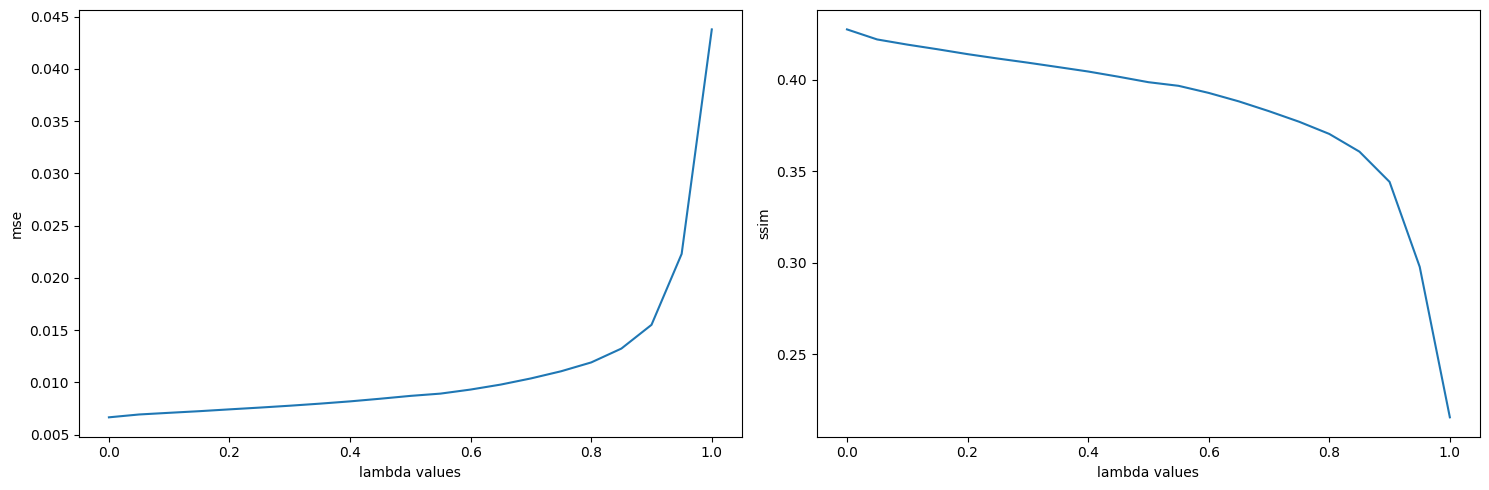

In [ ]:
l_hyp = np.linspace(0, 1, 21)
print(l_hyp)
# plot losses
fig, axs = plt.subplots(1, 2)

axs[0].plot(l_hyp, mse_scores)
axs[0].set_xlabel('lambda values')
axs[0].set_ylabel('mse')

axs[1].plot(l_hyp, ssim_scores)
axs[1].set_xlabel('lambda values')
axs[1].set_ylabel('ssim')


fig.set_size_inches(15, 5)
plt.tight_layout()
plt.show(block=True)

# Evaluation metrics

Metrics are calculated on the test set (Pat 0011, 0012, 0013)

In [16]:
# load network for psim calculation
loss_fn_alex = lpips.LPIPS(net='alex')

# function for calculating perceptual similarity score
def avg_perceptual_similarity(fixed, moved):
  """
  return mean perceptual similarity (over all sclices) as a score (1 - calculated perceptual distance between fixed and moved)
  """
  fixed = torch.from_numpy(2*fixed - 1).type(torch.float32).permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)
  moved = torch.from_numpy(2*moved - 1).type(torch.float32).permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)

  return 1 - np.mean(loss_fn_alex(fixed, moved).detach().numpy())

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\schwe/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:08<00:00, 27.4MB/s] 


Loading model from: c:\Users\schwe\miniconda3\envs\hypermorph\lib\site-packages\lpips\weights\v0.1\alex.pth


### Baseline

In [ ]:
# Baseline
cbct_start_mse = list()
cbct_end_mse = list()

cbct_start_ssim = list()
cbct_end_ssim = list()

cbct_start_psim_avg = list()
cbct_end_psim_avg = list()

path = '/content/data_preprocessed_scaled'
for root, dirs, files in os.walk(path):
      for file_name in files:
        # Check if the file is a FBCT image
        if not("0011" in file_name or "0012" in file_name or "0013" in file_name):
          continue
        if "_0000.nii.gz" in file_name:
          print(file_name)
          fbct_path = os.path.join(root, file_name)

          underscore_split = file_name.split('_')

          thorax_prefix = underscore_split[0]
          prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
          #print("Prefix: "+prefix)

          # Check if corresponding CBCT images exist
          cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
          cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

          if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):

            fbct = itk.imread(fbct_path, itk.F)
            cbct_start = itk.imread(cbct_start_path, itk.F)
            cbct_end = itk.imread(cbct_end_path, itk.F)

            fbct_data = np.transpose(itk.GetArrayFromImage(fbct), (2,1,0))
            cbct_start_data = np.transpose(itk.GetArrayFromImage(cbct_start), (2,1,0))
            cbct_end_data = np.transpose(itk.GetArrayFromImage(cbct_end), (2,1,0))
            print(cbct_start_result.shape)

            cbct_start_mse.append(mean_squared_error(cbct_start_data.flatten(), fbct_data.flatten()))
            cbct_end_mse.append(mean_squared_error(cbct_end_data.flatten(), fbct_data.flatten()))

            cbct_start_ssim.append(structural_similarity(cbct_start_data, fbct_data, data_range=fbct_data.max() - fbct_data.min()))
            cbct_end_ssim.append(structural_similarity(cbct_end_data, fbct_data, data_range=fbct_data.max() - fbct_data.min()))

            cbct_start_psim_avg.append(avg_perceptual_similarity(cbct_start_data, fbct_data))
            cbct_end_psim_avg.append(avg_perceptual_similarity(cbct_end_data, fbct_data))

In [ ]:
# Baseline alignment
print("MSE CBCT Start:", np.mean(cbct_start_mse))
print("MSE CBCT End:", np.mean(cbct_end_mse))

print("SSIM CBCT Start:", np.mean(cbct_start_ssim))
print("SSIM CBCT End:", np.mean(cbct_end_ssim))

print("PSIM CBCT Start:", np.mean(cbct_start_psim_avg))
print("PSIM CBCT End:", np.mean(cbct_end_psim_avg))

MSE CBCT Start: 0.06245668
MSE CBCT End: 0.06991337
SSIM CBCT Start: 0.14226753124350064
SSIM CBCT End: 0.13340969642477635
PSIM CBCT Start: 0.5503249853849411
PSIM CBCT End: 0.5191289752721786


### Rigid Alignment

In [ ]:
cbct_start_mse = list()
cbct_end_mse = list()

cbct_start_ssim = list()
cbct_end_ssim = list()

cbct_start_psim_avg = list()
cbct_end_psim_avg = list()

parameter_object_rigid = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object_rigid.GetDefaultParameterMap('rigid')
parameter_object_rigid.AddParameterMap(default_rigid_parameter_map)

path = '/content/data_preprocessed_scaled'
for root, dirs, files in os.walk(path):
      for file_name in files:
        # Check if the file is a FBCT image
        if not("0011" in file_name or "0012" in file_name or "0013" in file_name):
          continue
        if "_0000.nii.gz" in file_name:
          print(file_name)
          fbct_path = os.path.join(root, file_name)

          underscore_split = file_name.split('_')

          thorax_prefix = underscore_split[0]
          prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
          #print("Prefix: "+prefix)

          # Check if corresponding CBCT images exist
          cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
          cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

          if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):

            fbct = itk.imread(fbct_path, itk.F)
            cbct_start = itk.imread(cbct_start_path, itk.F)
            cbct_end = itk.imread(cbct_end_path, itk.F)

            # Call registration function
            result_image_start, _ = itk.elastix_registration_method(cbct_start, fbct, parameter_object=parameter_object_rigid, log_to_console=False)
            result_image_end, _ = itk.elastix_registration_method(cbct_end, fbct, parameter_object=parameter_object_rigid, log_to_console=False)

            fbct_data = np.transpose(itk.GetArrayFromImage(fbct), (2,1,0))
            cbct_start_data = np.transpose(itk.GetArrayFromImage(cbct_start), (2,1,0))
            cbct_end_data = np.transpose(itk.GetArrayFromImage(cbct_end), (2,1,0))
            cbct_start_result = np.transpose(itk.GetArrayFromImage(result_image_start), (2,1,0))
            cbct_end_result = np.transpose(itk.GetArrayFromImage(result_image_end), (2,1,0))

            cbct_start_mse.append(mean_squared_error(cbct_start_data.flatten(), cbct_start_result.flatten()))
            cbct_end_mse.append(mean_squared_error(cbct_end_data.flatten(), cbct_end_result.flatten()))

            cbct_start_ssim.append(structural_similarity(cbct_start_data, cbct_start_result, data_range=cbct_start_result.max() - cbct_start_result.min()))
            cbct_end_ssim.append(structural_similarity(cbct_end_data, cbct_end_result, data_range=cbct_end_result.max() - cbct_end_result.min()))

            cbct_start_psim_avg.append(avg_perceptual_similarity(cbct_start_data, cbct_start_result))
            cbct_end_psim_avg.append(avg_perceptual_similarity(cbct_end_data, cbct_end_result))

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
ThoraxCBCT_0012_2_0000.nii.gz
ThoraxCBCT_0013_2_0000.nii.gz
ThoraxCBCT_0012_0_0000.nii.gz
ThoraxCBCT_0012_3_0000.nii.gz
ThoraxCBCT_0011_0_0000.nii.gz
ThoraxCBCT_0013_0_0000.nii.gz
ThoraxCBCT_0011_1_0000.nii.gz
ThoraxCBCT_0013_1_0000.nii.gz
ThoraxCBCT_0013_3_0000.nii.gz
ThoraxCBCT_0012_1_0000.nii.gz


In [ ]:
# Rigid alignment
print("MSE CBCT Start:", np.mean(cbct_start_mse))
print("MSE CBCT End:", np.mean(cbct_end_mse))

print("SSIM CBCT Start:", np.mean(cbct_start_ssim))
print("SSIM CBCT End:", np.mean(cbct_end_ssim))

print("PSIM CBCT Start:", np.mean(cbct_start_psim_avg))
print("PSIM CBCT End:", np.mean(cbct_end_psim_avg))

MSE CBCT Start: 0.08183752
MSE CBCT End: 0.095342495
SSIM CBCT Start: 0.24448845776067105
SSIM CBCT End: 0.19642904301104946
PSIM CBCT Start: 0.493190199136734
PSIM CBCT End: 0.4507329136133194


### Affine Alignment

In [ ]:
cbct_start_mse = list()
cbct_end_mse = list()

cbct_start_ssim = list()
cbct_end_ssim = list()

cbct_start_psim_avg = list()
cbct_end_psim_avg = list()

parameter_object_affine = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object_affine.GetDefaultParameterMap('affine')
parameter_object_affine.AddParameterMap(default_affine_parameter_map)


path = '/content/data_preprocessed_scaled'
for root, dirs, files in os.walk(path):
      for file_name in files:
        # Check if the file is a FBCT image
        if not("0011" in file_name or "0012" in file_name or "0013" in file_name):
          continue
        if "_0000.nii.gz" in file_name:
          print(file_name)
          fbct_path = os.path.join(root, file_name)

          underscore_split = file_name.split('_')

          thorax_prefix = underscore_split[0]
          prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
          #print("Prefix: "+prefix)

          # Check if corresponding CBCT images exist
          cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
          cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

          if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):


            fbct = itk.imread(fbct_path, itk.F)
            cbct_start = itk.imread(cbct_start_path, itk.F)
            cbct_end = itk.imread(cbct_end_path, itk.F)

            # Call registration function
            result_image_start, _ = itk.elastix_registration_method(cbct_start, fbct, parameter_object=parameter_object_affine, log_to_console=False)
            result_image_end, _ = itk.elastix_registration_method(cbct_end, fbct, parameter_object=parameter_object_affine, log_to_console=False)

            fbct_data = np.transpose(itk.GetArrayFromImage(fbct), (2,1,0))
            cbct_start_data = np.transpose(itk.GetArrayFromImage(cbct_start), (2,1,0))
            cbct_end_data = np.transpose(itk.GetArrayFromImage(cbct_end), (2,1,0))
            cbct_start_result = np.transpose(itk.GetArrayFromImage(result_image_start), (2,1,0))
            cbct_end_result = np.transpose(itk.GetArrayFromImage(result_image_end), (2,1,0))
            print(cbct_start_result.shape)

            cbct_start_mse.append(mean_squared_error(cbct_start_data.flatten(), cbct_start_result.flatten()))
            cbct_end_mse.append(mean_squared_error(cbct_end_data.flatten(), cbct_end_result.flatten()))

            cbct_start_ssim.append(structural_similarity(cbct_start_data, cbct_start_result, data_range=cbct_start_result.max() - cbct_start_result.min()))
            cbct_end_ssim.append(structural_similarity(cbct_end_data, cbct_end_result, data_range=cbct_end_result.max() - cbct_end_result.min()))

            cbct_start_psim_avg.append(avg_perceptual_similarity(cbct_start_data, cbct_start_result))
            cbct_end_psim_avg.append(avg_perceptual_similarity(cbct_end_data, cbct_end_result))

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
ThoraxCBCT_0012_2_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0013_2_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0012_0_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0012_3_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0011_0_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0013_0_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0011_1_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0013_1_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0013_3_0000.nii.gz
(256, 256, 32)
ThoraxCBCT_0012_1_0000.nii.gz
(256, 256, 32)


In [ ]:
# Affine alignment
print("MSE CBCT Start:", np.mean(cbct_start_mse))
print("MSE CBCT End:", np.mean(cbct_end_mse))

print("SSIM CBCT Start:", np.mean(cbct_start_ssim))
print("SSIM CBCT End:", np.mean(cbct_end_ssim))

print("PSIM CBCT Start:", np.mean(cbct_start_psim_avg))
print("PSIM CBCT End:", np.mean(cbct_end_psim_avg))

MSE CBCT Start: 0.08646019
MSE CBCT End: 0.12709327
SSIM CBCT Start: 0.21492081748367192
SSIM CBCT End: 0.1387727781216474
PSIM CBCT Start: 0.4757645219564438
PSIM CBCT End: 0.3824416995048523


### Voxelmorph



In [ ]:
cbct_start_mse = list()
cbct_end_mse = list()

cbct_start_ssim = list()
cbct_end_ssim = list()

cbct_start_psim_avg = list()
cbct_end_psim_avg = list()

path = '/content/data_preprocessed_scaled'
for root, dirs, files in os.walk(path):
      for file_name in files:
        # Check if the file is a FBCT image
        if not("0011" in file_name or "0012" in file_name or "0013" in file_name):
          continue
        if "_0000.nii.gz" in file_name:
          print(file_name)
          fbct_path = os.path.join(root, file_name)

          underscore_split = file_name.split('_')

          thorax_prefix = underscore_split[0]
          prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]

          # Check if corresponding CBCT images exist
          cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
          cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

          if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):

            cbct_start_out = 'cbct_start_moved.nii.gz'
            cbct_end_out = 'cbct_end_moved.nii.gz'

            # call voxelmorph register script
            %run -i /content/voxelmorph_dlmb/scripts/tf/register.py --moving {str(fbct_path)} --fixed {str(cbct_start_path)} --moved {cbct_start_out} --model /content/gdrive/MyDrive/DLMB_Project/voxelmorph_models/0500.h5 --gpu 0
            %run -i /content/voxelmorph_dlmb/scripts/tf/register.py --moving {str(fbct_path)} --fixed {str(cbct_end_path)} --moved {cbct_end_out} --model /content/gdrive/MyDrive/DLMB_Project/voxelmorph_models/0500.h5 --gpu 0

            cbct_start_data = nib.load(cbct_start_path).get_fdata()
            cbct_end_data = nib.load(cbct_end_path).get_fdata()
            cbct_start_result = nib.load(cbct_start_out).get_fdata()
            cbct_end_result = nib.load(cbct_end_out).get_fdata()

            cbct_start_mse.append(mean_squared_error(cbct_start_data.flatten(), cbct_start_result.flatten()))
            cbct_end_mse.append(mean_squared_error(cbct_end_data.flatten(), cbct_end_result.flatten()))

            cbct_start_ssim.append(structural_similarity(cbct_start_data, cbct_start_result, data_range=cbct_start_result.max() - cbct_start_result.min()))
            cbct_end_ssim.append(structural_similarity(cbct_end_data, cbct_end_result, data_range=cbct_end_result.max() - cbct_end_result.min()))

            cbct_start_psim_avg.append(avg_perceptual_similarity(cbct_start_data, cbct_start_result))
            cbct_end_psim_avg.append(avg_perceptual_similarity(cbct_end_data, cbct_end_result))



ThoraxCBCT_0012_2_0000.nii.gz
1/1 [==============================] - 0s 362ms/step
ThoraxCBCT_0013_2_0000.nii.gz


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 352ms/step
ThoraxCBCT_0012_0_0000.nii.gz
1/1 [==============================] - 0s 353ms/step
ThoraxCBCT_0012_3_0000.nii.gz
1/1 [==============================] - 0s 378ms/step
ThoraxCBCT_0011_0_0000.nii.gz
1/1 [==============================] - 0s 369ms/step
ThoraxCBCT_0013_0_0000.nii.gz
1/1 [==============================] - 0s 359ms/step
ThoraxCBCT_0011_1_0000.nii.gz
1/1 [==============================] - 0s 357ms/step
ThoraxCBCT_0013_1_0000.nii.gz
1/1 [==============================] - 0s 358ms/step
ThoraxCBCT_0013_3_0000.nii.gz
1/1 [==============================] - 1s 544ms/step
ThoraxCBCT_0012_1_0000.nii.gz
1/1 [==============================] - 0s 445ms/step


In [ ]:
print('##################################################')
print('mse cbct_start:', np.mean(cbct_start_mse))
print('mse cbct_end:', np.mean(cbct_end_mse))
print('##################################################')
print('ssim cbct_start:', np.mean(cbct_start_ssim))
print('ssim cbct_end:', np.mean(cbct_end_ssim))
print('##################################################')
print('psim cbct_start:', np.mean(cbct_start_psim_avg))
print('psim cbct_end:', np.mean(cbct_end_psim_avg))
print('##################################################')

##################################################
mse cbct_start: 0.03172183693133261
mse cbct_end: 0.0425034251231122
##################################################
ssim cbct_start: 0.2622131660993173
ssim cbct_end: 0.20165516704798817
##################################################
psim cbct_start: 0.5756088376045227
psim cbct_end: 0.5336970001459121
##################################################


### Hypermorph

In [ ]:
cbct_start_mse = list()
cbct_end_mse = list()

cbct_start_ssim = list()
cbct_end_ssim = list()

cbct_start_psim_avg = list()
cbct_end_psim_avg = list()

data_path = '/content/data_preprocessed_scaled'
lambda_values = [0.2, 0.4, 0.6, 0.8, 0.9]

hypermorph_model = vxm.networks.HyperVxmDense.load('/content/gdrive/MyDrive/DLMB_Project/hypermorph_models/1000.h5')

for i, hyp in enumerate(lambda_values):
    print("i: ", i)
    temp_mse_start_scores = []
    temp_mse_end_scores = []

    temp_ssim_start_scores = []
    temp_ssim_end_scores = []

    temp_psim_start_scores = []
    temp_psim_end_scores = []

    hyp = np.array([[hyp]], dtype='float32')  # reformat hyperparam

    for root, dirs, files in os.walk(data_path):
          for file_name in files:
            # Check if the file is a FBCT image
            if not("0011" in file_name or "0012" in file_name or "0013" in file_name):
              continue
            if "_0000.nii.gz" in file_name:
              #print(file_name)
              fbct_path = os.path.join(root, file_name)

              underscore_split = file_name.split('_')

              thorax_prefix = underscore_split[0]
              prefix = thorax_prefix+"_"+underscore_split[1]+"_"+underscore_split[2]
              #print("Prefix: "+prefix)

              # Check if corresponding CBCT images exist
              cbct_start_path = os.path.join(root, f"{prefix}_0001.nii.gz")
              cbct_end_path = os.path.join(root, f"{prefix}_0002.nii.gz")

              if os.path.exists(cbct_start_path) and os.path.exists(cbct_end_path):

                cbct_start_out = 'cbct_start_moved.nii.gz'
                cbct_end_out = 'cbct_end_moved.nii.gz'


              ##################################################################
              moving = vxm.py.utils.load_volfile(fbct_path, add_batch_axis=True,
                                    add_feat_axis=True)
              fixed_start = vxm.py.utils.load_volfile(cbct_start_path, add_batch_axis=True,
                                  add_feat_axis=True)
              img_start = hypermorph_model.predict([moving, fixed_start, hyp])[0].squeeze()

              fixed_end = vxm.py.utils.load_volfile(cbct_end_path, add_batch_axis=True,
                                  add_feat_axis=True)
              img_end = hypermorph_model.predict([moving, fixed_end, hyp])[0].squeeze()


              ##################################################################
              temp_mse_start_scores.append(mean_squared_error(img_start.flatten(), fixed_start.flatten()))
              temp_mse_end_scores.append(mean_squared_error(img_end.flatten(), fixed_end.flatten()))

              temp_ssim_start_scores.append(structural_similarity(img_start, fixed_start.squeeze(), data_range=1))
              temp_ssim_end_scores.append(structural_similarity(img_end, fixed_end.squeeze(), data_range=1))

              fbct_data = torch.from_numpy(2*moving.squeeze() - 1).type(torch.float32)
              cbct_start_data = torch.from_numpy(2*fixed_start.squeeze() - 1).type(torch.float32)
              cbct_end_data = torch.from_numpy(2*fixed_end.squeeze() - 1).type(torch.float32)
              cbct_start_result = torch.from_numpy(2*img_start.squeeze() - 1).type(torch.float32)
              cbct_end_result = torch.from_numpy(2*img_end.squeeze() - 1).type(torch.float32)

              fbct_data = fbct_data.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)
              cbct_start_data = cbct_start_data.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)
              cbct_end_data = cbct_end_data.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)
              cbct_start_result = cbct_start_result.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)
              cbct_end_result = cbct_end_result.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)

              temp_psim_start_scores.append(1 - np.mean(loss_fn_alex(cbct_start_data, cbct_start_result).detach().numpy())) # psim is distance -> lower is better
              temp_psim_end_scores.append(1 - np.mean(loss_fn_alex(cbct_end_data, cbct_end_result).detach().numpy()))

    cbct_start_mse.append(np.mean(temp_mse_start_scores))
    cbct_end_mse.append(np.mean(temp_mse_end_scores))


    cbct_start_ssim.append(np.mean(temp_ssim_start_scores))
    cbct_end_ssim.append(np.mean(temp_ssim_end_scores))


    cbct_start_psim_avg.append(np.mean(temp_psim_start_scores))
    cbct_end_psim_avg.append(np.mean(temp_psim_end_scores))

i:  0
1/1 [==============================] - 0s 249ms/step
i:  1
1/1 [==============================] - 0s 183ms/step
i:  2
1/1 [==============================] - 0s 242ms/step
i:  3
1/1 [==============================] - 0s 215ms/step
i:  4
1/1 [==============================] - 0s 234ms/step


In [ ]:
for i, hyp in enumerate(lambda_values):
  print('mse cbct_start (lambda {0:.1f}):'.format(hyp), cbct_start_mse[i])
  print('mse cbct_end (lambda {0:.1f}):'.format(hyp), cbct_end_mse[i])
  print('ssim cbct_start (lambda {0:.1f}):'.format(hyp), cbct_start_ssim[i])
  print('ssim cbct_end (lambda {0:.1f}):'.format(hyp), cbct_end_ssim[i])
  print('psim cbct_start (lambda {0:.1f}):'.format(hyp), cbct_start_psim_avg[i])
  print('psim cbct_end (lambda {0:.1f}):'.format(hyp), cbct_end_psim_avg[i])
  print('##################################################')

mse cbct_start (lambda 0.2): 0.012086226
mse cbct_end (lambda 0.2): 0.014434228
ssim cbct_start (lambda 0.2): 0.3739974109156849
ssim cbct_end (lambda 0.2): 0.3530253025632035
psim cbct_start (lambda 0.2): 0.5546562969684601
psim cbct_end (lambda 0.2): 0.5355204045772552
##################################################
mse cbct_start (lambda 0.4): 0.012839603
mse cbct_end (lambda 0.4): 0.015194085
ssim cbct_start (lambda 0.4): 0.36729603640839537
ssim cbct_end (lambda 0.4): 0.3452825028864058
psim cbct_start (lambda 0.4): 0.5545750170946121
psim cbct_end (lambda 0.4): 0.535642397403717
##################################################
mse cbct_start (lambda 0.6): 0.013850091
mse cbct_end (lambda 0.6): 0.01635648
ssim cbct_start (lambda 0.6): 0.3597806548573465
ssim cbct_end (lambda 0.6): 0.33661804097527265
psim cbct_start (lambda 0.6): 0.5584132373332977
psim cbct_end (lambda 0.6): 0.538437220454216
##################################################
mse cbct_start (lambda 0.8): 0.0

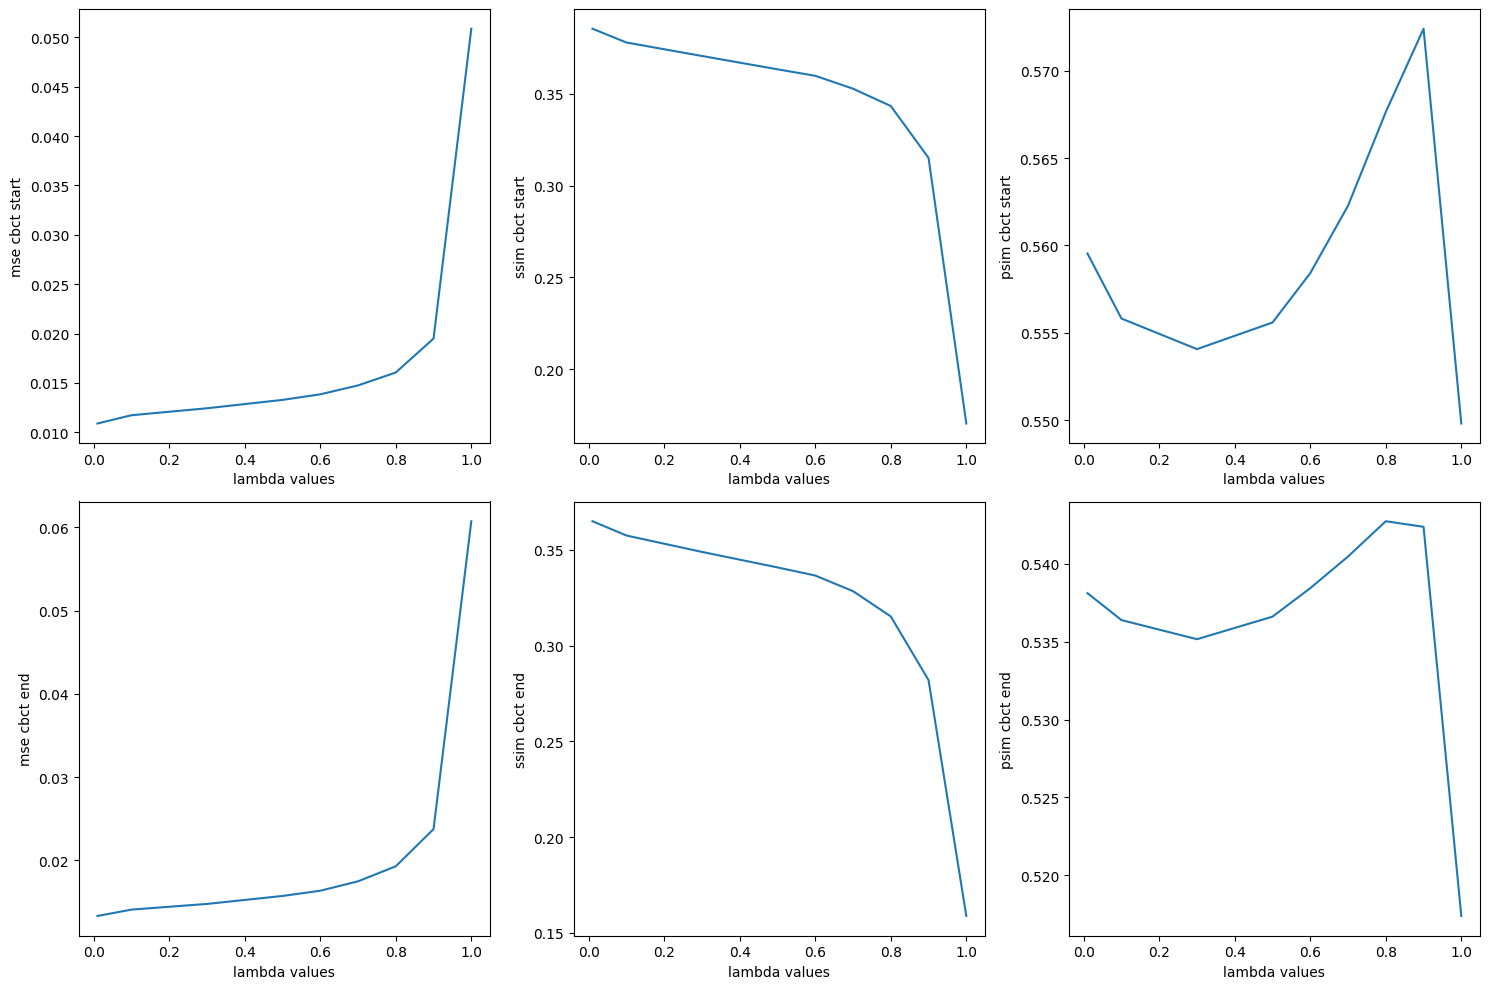

In [ ]:
# plot losses/scores/whatever
fig, axs = plt.subplots(2, 3)

axs[0][0].plot(lambda_values, cbct_start_mse)
axs[0][0].set_xlabel('lambda values')
axs[0][0].set_ylabel('mse cbct start')

axs[0][1].plot(lambda_values, cbct_start_ssim)
axs[0][1].set_xlabel('lambda values')
axs[0][1].set_ylabel('ssim cbct start')

axs[0][2].plot(lambda_values, cbct_start_psim_avg)
axs[0][2].set_xlabel('lambda values')
axs[0][2].set_ylabel('psim cbct start')

axs[1][0].plot(lambda_values, cbct_end_mse)
axs[1][0].set_xlabel('lambda values')
axs[1][0].set_ylabel('mse cbct end')

axs[1][1].plot(lambda_values, cbct_end_ssim)
axs[1][1].set_xlabel('lambda values')
axs[1][1].set_ylabel('ssim cbct end')

axs[1][2].plot(lambda_values, cbct_end_psim_avg)
axs[1][2].set_xlabel('lambda values')
axs[1][2].set_ylabel('psim cbct end')

fig.set_size_inches(15, 10)
plt.tight_layout()
plt.show(block=True)

As you can see in this plot, a value of $\lambda$ = 0.9 yields the best perceptual similarity (our preferred metric, because it seems to represent our impressions best as to what models yield "good" results), even though the mse score and the structural similarity is worse than for other values.

# GUI

In [14]:
# Helper methods, fixed and moving are the respective paths only!
def perform_rigid_alignment(fixed, moving):
  parameter_object_rigid = itk.ParameterObject.New()
  default_rigid_parameter_map = parameter_object_rigid.GetDefaultParameterMap('rigid')
  parameter_object_rigid.AddParameterMap(default_rigid_parameter_map)

  fixed_img = itk.imread(fixed, itk.F)
  moving_img = itk.imread(moving, itk.F)
  moved_img , _ = itk.elastix_registration_method(fixed_img, moving_img, parameter_object=parameter_object_rigid, log_to_console=False)
  return np.transpose(itk.GetArrayFromImage(moved_img), (2,1,0))


def perform_affine_alignment(fixed, moving):
  parameter_object_affine = itk.ParameterObject.New()
  default_affine_parameter_map = parameter_object_affine.GetDefaultParameterMap('affine')
  parameter_object_affine.AddParameterMap(default_affine_parameter_map)
  fixed_img = itk.imread(fixed, itk.F)
  moving_img = itk.imread(moving, itk.F)

  moved_img , _ = itk.elastix_registration_method(fixed_img, moving_img, parameter_object=parameter_object_affine, log_to_console=False)
  return np.transpose(itk.GetArrayFromImage(moved_img), (2,1,0))


def perform_voxelmorph(fixed, moving):

  %run -i ./scripts/tf/register.py --moving {str(moving)} --fixed {str(fixed)} --moved ./gui/moved.nii.gz --model ./voxelmorph_models/0500.h5 --gpu 0
  return vxm.py.utils.load_volfile("./gui/moved.nii.gz", add_batch_axis=False, add_feat_axis=False)


def perform_hypermorph(fixed, moving, lambda_value):
  %run -i ./scripts/tf/register_hypermorph.py --moving {str(moving)} --fixed {str(fixed)} --moved ./gui/moved.nii.gz --model ./hypermorph_models/1000.h5 --gpu 0 --lambda_val {lambda_value}
  return vxm.py.utils.load_volfile("./gui/moved.nii.gz", add_batch_axis=False, add_feat_axis=False)


In [8]:
%mkdir gui

Dropdown(description='Choose Image:', options={'Image train 1': './data/data_preprocessed_scaled/ThoraxCBCT_00…

Dropdown(description='Choose Method:', index=3, options={'Rigid Alignment': <reg_methods.RIGID: 1>, 'Affine Al…

IntSlider(value=0, description='Slice:', layout=Layout(width='50%'), max=31)

FloatSlider(value=0.0, description='Lambda for Hypermorph:', layout=Layout(width='50%'), max=1.0, step=0.05)

Button(description='Register', style=ButtonStyle())

<Figure size 640x480 with 0 Axes>

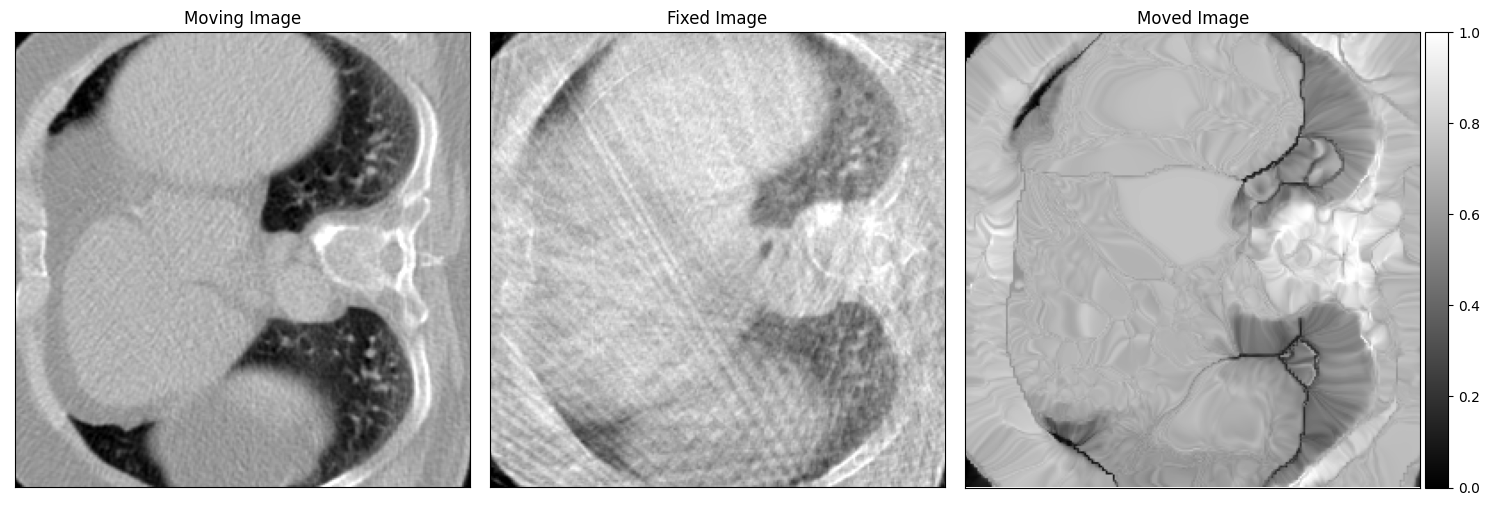

MSE Score: 0.0078
Structural Similarity: 0.3792
Perceptual Similarity: 0.4814


In [20]:
#%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

reg_methods = Enum('reg_methods', ['RIGID', 'AFFINE', 'VOXELMORPH' , 'HYPERMORPH'])

def perform_registration(fixed, moving, fixed_filepath, moving_filepath, registration_method):

    if registration_method == reg_methods.RIGID:
      moved = perform_rigid_alignment(fixed_filepath, moving_filepath)
    elif registration_method == reg_methods.AFFINE:
      moved = perform_affine_alignment(fixed_filepath, moving_filepath)
    elif registration_method == reg_methods.VOXELMORPH:
      moved = perform_voxelmorph(fixed_filepath, moving_filepath)
    elif registration_method == reg_methods.HYPERMORPH:
      moved = perform_hypermorph(fixed_filepath, moving_filepath, lambda_slider.value)


    # Return the registered image and registration scores
    mse_score = mean_squared_error(moved.flatten(), fixed.flatten())  # Replace with your MSE calculation
    ssim_score = structural_similarity(moved.squeeze(), fixed.squeeze(), data_range=1)


    moved_copy = torch.from_numpy(2*moved.squeeze() - 1).type(torch.float32)
    moved_copy = moved_copy.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)

    fixed_copy = torch.from_numpy(2*fixed.squeeze() - 1).type(torch.float32)
    fixed_copy = fixed_copy.permute(2, 0, 1).unsqueeze(1).repeat(1, 3, 1, 1)

    psim_score = 1 - np.mean(loss_fn_alex(moved_copy, fixed_copy).detach().numpy())

    return moved, mse_score, ssim_score, psim_score

# Function to update the displayed images and scores
def update_display(fixed, moving, moved, mse_score, ssim_score, psim_score):
    # Plot images with matplotlib
    #fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    clear_output(wait=True)

    display(image_dropdown, method_dropdown, slider, lambda_slider, register_button)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1.062]})

    im1 = axes[0].imshow(moving.squeeze()[:, :, slider.value], cmap='gray')
    axes[0].set_title('Moving Image')

    im2 = axes[1].imshow(fixed.squeeze()[:, :, slider.value], cmap='gray')
    axes[1].set_title('Fixed Image')

    im3 = axes[2].imshow(moved.squeeze()[:, :, slider.value], cmap='gray')
    axes[2].set_title('Moved Image')

    for ax in axes:
      ax.set_xticks([])
      ax.set_yticks([])

    divider = make_axes_locatable(axes[2])
    cax = divider.append_axes('right', size='5%', pad= 0.05)

    cbar = plt.colorbar(im3, cax=cax)

    plt.tight_layout()
    plt.show()

    # Display scores
    print(f'MSE Score: {mse_score:.4f}')
    print(f'Structural Similarity: {ssim_score:.4f}')
    print(f'Perceptual Similarity: {psim_score:.4f}')



# Dropdown menu for choosing images
image_dropdown = widgets.Dropdown(
    options={'Image train 1': './data/data_preprocessed_scaled/ThoraxCBCT_0000_0_0000.nii.gz',
             'Image train 2': './data/data_preprocessed_scaled/ThoraxCBCT_0003_1_0000.nii.gz',
             'Image train 3': './data/data_preprocessed_scaled/ThoraxCBCT_0005_1_0000.nii.gz',
             'Image test 1': './data/data_preprocessed_scaled/ThoraxCBCT_0011_1_0000.nii.gz',
             'Image test 2': './data/data_preprocessed_scaled/ThoraxCBCT_0012_1_0000.nii.gz',
             'Image test 3': './data/data_preprocessed_scaled/ThoraxCBCT_0013_1_0000.nii.gz'},
    value='./data/data_preprocessed_scaled/ThoraxCBCT_0000_0_0000.nii.gz',  # Set a default value
    description='Choose Image:'
)

start_end_dropdown = widgets.Dropdown(
    options={'CBCT Start': 1, 'CBCT End': 2},
    value=2,
    description='Choose image to be registered'
)

# Dropdown menu for choosing registration methods
method_dropdown = widgets.Dropdown(
    options={'Rigid Alignment': reg_methods.RIGID, 'Affine Alignment': reg_methods.AFFINE, 'Voxelmorph': reg_methods.VOXELMORPH, 'Hypermorph': reg_methods.HYPERMORPH},
    value=reg_methods.HYPERMORPH,  # Set a default value
    description='Choose Method:'
)

# Slider for adjusting image slices
slider = widgets.IntSlider(min=0, max=31, step=1, value=0, description='Slice:', layout=Layout(width='50%'))

lambda_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0, description='Lambda for Hypermorph:', layout=Layout(width='50%'))


# Button to trigger registration
register_button = widgets.Button(description='Register')

# Function to handle button click event
def on_button_click(b):
    moving_filepath = image_dropdown.value
    filepath_ending = start_end_dropdown.value # either 1 or 2
    fixed_filepath = moving_filepath[:-8] + str(filepath_ending) + moving_filepath[-7:]

    # now retrieve the data
    moving_image = vxm.py.utils.load_volfile(moving_filepath, add_batch_axis=True,
                                    add_feat_axis=True)
    fixed_image = vxm.py.utils.load_volfile(fixed_filepath, add_batch_axis=True,
                                    add_feat_axis=True)

    registration_method = method_dropdown.value

    moved_image, mse_score, ssim_score, psim_score = perform_registration(fixed_image, moving_image, fixed_filepath, moving_filepath, registration_method)
    update_display(fixed_image, moving_image, moved_image, mse_score, ssim_score, psim_score)

# Attach the button click event handler
register_button.on_click(on_button_click)

# Display widgets
display(image_dropdown, method_dropdown, slider, lambda_slider, register_button)

# Initial display
on_button_click(register_button)